### Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import klib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### data

In [2]:
train_data_set = pd.read_csv("Train.csv")
test_data_set = pd.read_csv("Test.csv")

### There are 12 columns ###

In [3]:
train_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train_data_set.isnull().sum()
# There are to columns where we have the null values
# we will deal with the null values with mean and mode

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# for the Item_Weight
train_data_set["Item_Weight"].fillna(train_data_set["Item_Weight"].mean(), inplace=True)
# test_data_set["Item_Weight"].fillna(test_data_set["Item_Weight"].mean(), inplace=True)


In [6]:
# for the Outlet_Size
mode_of_outlet_size = train_data_set.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))

In [7]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [8]:
missing_values = train_data_set["Outlet_Size"].isnull()
# print(missing_values)

In [9]:
train_data_set.loc[missing_values, "Outlet_Size"] = train_data_set.loc[missing_values, "Outlet_Type"].apply(lambda x: mode_of_outlet_size[x])

### Data Analysis

In [10]:
train_data_set.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
sns.set()

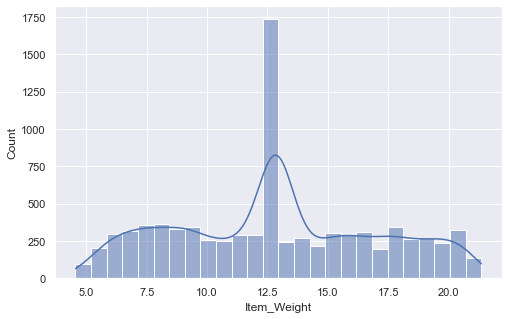

In [12]:
# Item_Weight
plt.figure(figsize=[8, 5])
sns.histplot(train_data_set["Item_Weight"], kde=True)
# sns.displot(train_data_set["Item_Weight"])
plt.show()

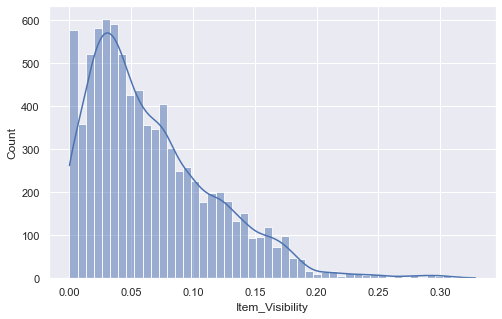

In [13]:
# Item_Visibility
plt.figure(figsize=[8, 5])
sns.histplot(train_data_set["Item_Visibility"], kde=True)
plt.show()

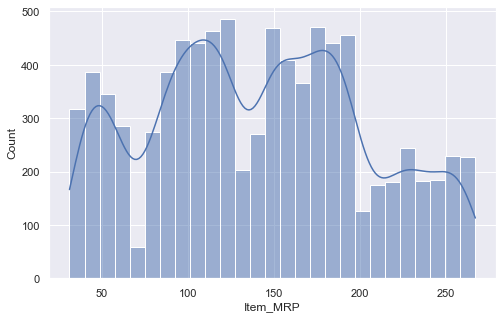

In [14]:
# Item_MRP
plt.figure(figsize=[8, 5])
sns.histplot(train_data_set["Item_MRP"], kde=True)
plt.show()

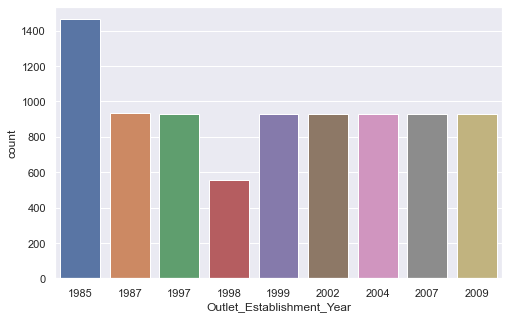

In [15]:
# Outlet_Establishment_Year
plt.figure(figsize=[8, 5])
sns.countplot(x="Outlet_Establishment_Year", data=train_data_set)
plt.show()

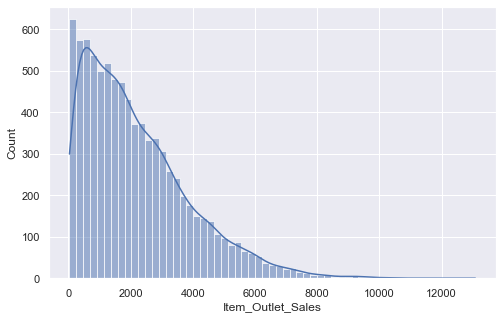

In [16]:
# Item_Outlet_Sales
plt.figure(figsize=[8, 5])
sns.histplot(train_data_set["Item_Outlet_Sales"], kde=True)
plt.show()

In [17]:
train_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### categorical columns
1. Item_Fat_Content
2. Item_Type
3. Outlet_Size
4. Outlet_Location_Type
5. Outlet_Type

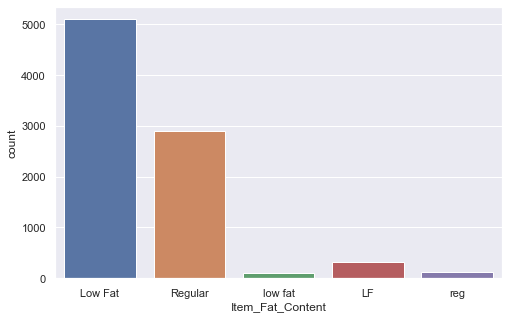

In [18]:
# Item_Fat_Content
plt.figure(figsize=[8, 5])
sns.countplot(x="Item_Fat_Content", data=train_data_set)
# plt.ylim([0, 6000])
plt.show()

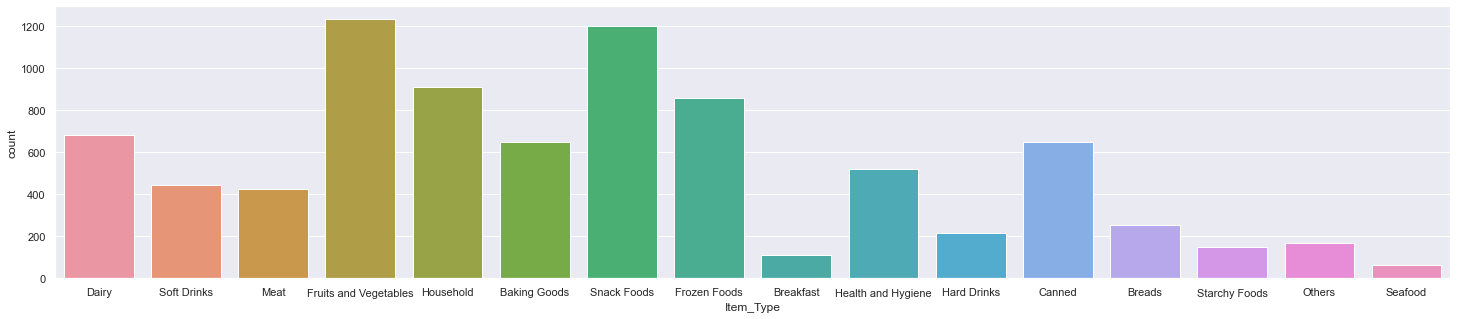

In [19]:
# Item_Type
plt.figure(figsize=[25, 5])
sns.countplot(x="Item_Type", data=train_data_set)
plt.show()

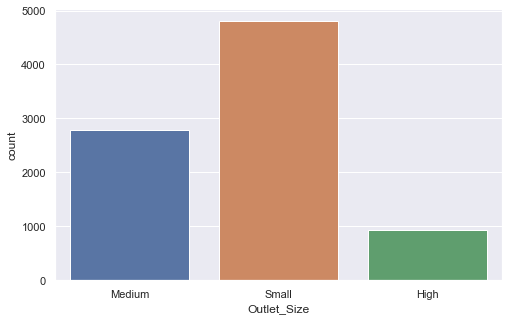

In [20]:
# Outlet_Size
plt.figure(figsize=[8, 5])
sns.countplot(x="Outlet_Size", data=train_data_set)
plt.show()

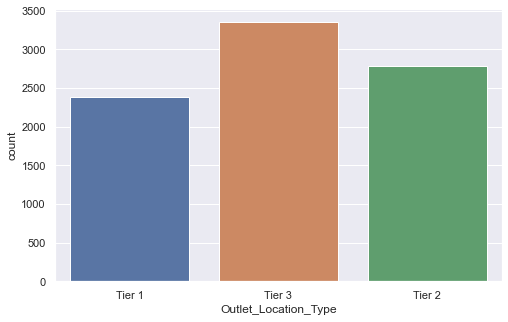

In [21]:
# Outlet_Location_Type
plt.figure(figsize=[8, 5])
sns.countplot(x="Outlet_Location_Type", data=train_data_set)
plt.show()

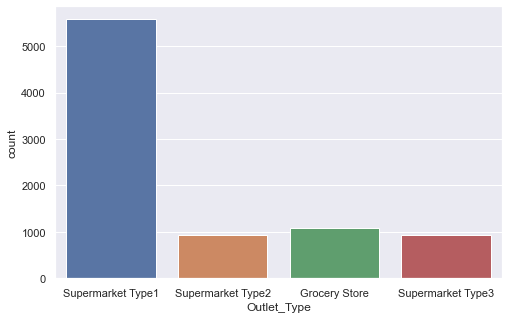

In [22]:
# Outlet_Type
plt.figure(figsize=[8, 5])
sns.countplot(x="Outlet_Type", data=train_data_set)
plt.show()

### cleaning the data in the Item_Fat_Content

In [23]:
# handling the Item_Fat_Content similar categories
# here Low Fat is same as LF, low fat
# and Regular is same as reg

train_data_set.replace({"Item_Fat_Content": {"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"}}, inplace=True)

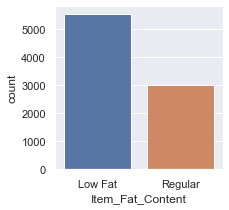

In [24]:
# after cleaning the data

plt.figure(figsize=[3, 3])
sns.countplot(x="Item_Fat_Content", data=train_data_set)
plt.show()

### Label Encoding

In [25]:
label_encoding = LabelEncoder()

In [26]:
train_data_set = train_data_set.apply(label_encoding.fit_transform)

In [27]:
train_data_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,0,664,4,5592,9,4,1,0,1,2540
1,8,57,1,880,14,473,3,8,1,2,2,422
2,662,376,0,715,10,2901,9,4,1,0,1,1639
3,1121,393,1,0,6,4227,0,3,2,2,0,670
4,1297,265,0,0,9,627,1,1,0,2,1,865


### splitting the train_data_set into train and test

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = train_data_set.drop("Item_Outlet_Sales", axis=1)

In [30]:
y = train_data_set["Item_Outlet_Sales"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### test_size = 0.2 means 20% of the data will be used for test
### random_state = 2 means there will be 2 split of data